# Clustering Analysis

In [1]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading libraries for machine learning - clustering analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the file
hotel_df = pd.read_csv("/Users/georgekalfas/Downloads/ML-HotelReservations/EDA-ML/Hotel Reservations.csv")

In [3]:
# creating a copy of the hotel_df
hotel_df_copy = hotel_df.copy()

In [4]:
# dropping booking_id column
hotel_df_copy.drop('Booking_ID', axis=1, inplace=True)

In [5]:
# selecting relevant columns for clustering
selected_columns = ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'room_type_reserved', 'avg_price_per_room', 'no_of_special_requests']

In [6]:
# creating a new DataFrame with only the selected columns
selected_df = hotel_df_copy[selected_columns].copy()

In [7]:
# handling categorical variables using one-hot encoding
selected_df = pd.get_dummies(selected_df, columns=['type_of_meal_plan', 'room_type_reserved'])

In [8]:
# handling missing values if any
selected_df.fillna(0, inplace=True)  # filling missing values with 0, you might choose a different strategy

In [9]:
# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)

In [10]:
# applying K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [11]:
# adding the cluster labels to the DataFrame
selected_df['Cluster_Labels'] = kmeans.labels_

In [12]:
# analyzing the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # inversing transform the centers to interpret them in the original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_df.columns[:-1])  # excluding the 'Cluster_Labels' column

In [13]:
# viewing the cluster centers (representative values for each cluster)
print(cluster_centers_df)

   no_of_adults  no_of_children  avg_price_per_room  no_of_special_requests  \
0      1.857302        0.024197           99.728702                0.572900   
1      1.734371        0.058649           94.256693                0.550890   
2      2.109882        0.303418          130.108579                0.838906   

   type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
0                   1.643130e-14                   3.682839e-01   
1                   1.000000e+00                   5.523360e-15   
2                   9.526414e-01                   4.188937e-02   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                   6.204244e-04                    6.310957e-01   
1                  -3.361027e-18                    5.467848e-15   
2                  -1.897354e-19                    5.469236e-03   

   room_type_reserved_Room_Type 1  room_type_reserved_Room_Type 2  \
0                        0.989329                        0.003474   
1  

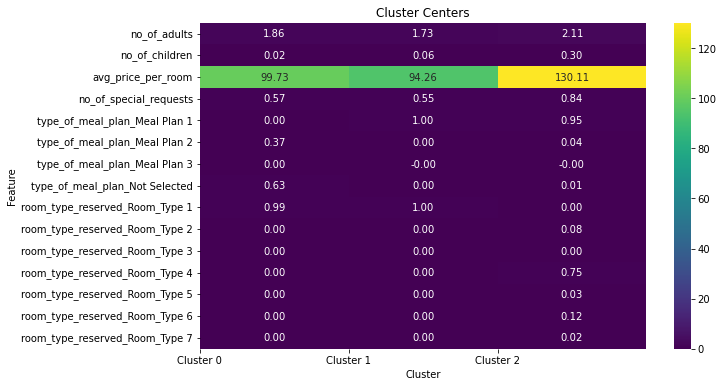

In [14]:
# plotting a heatmap for cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.T, annot=True, fmt='.2f', cmap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.xticks(ticks=range(num_clusters), labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

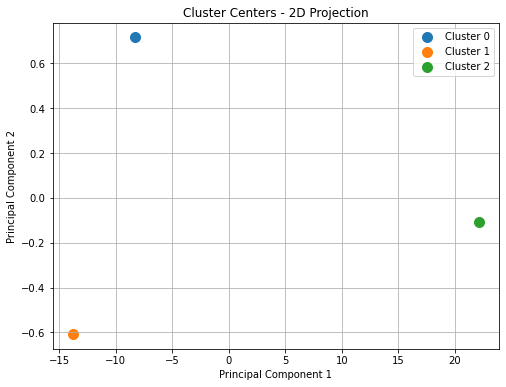

In [15]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cluster_centers_df)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1], label=f'Cluster {i}', s=100)

plt.title('Cluster Centers - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

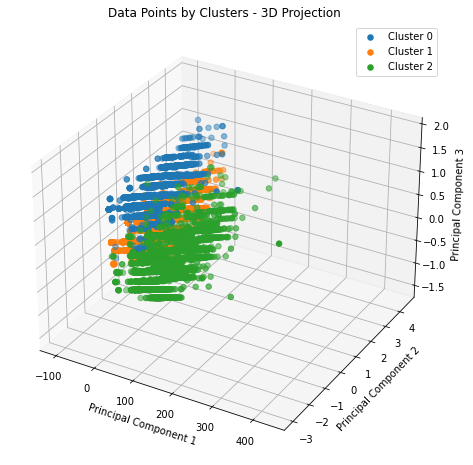

In [16]:
from sklearn.decomposition import PCA

# Assuming 'selected_df' contains the original data with cluster labels

# Reduce dimensionality for visualization using PCA with 3 components
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(selected_df.drop('Cluster_Labels', axis=1))  # Drop the cluster labels column

# Create a 3D scatter plot with data points colored by clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster_data = reduced_data_3d[selected_df['Cluster_Labels'] == i]
    ax.scatter(
        cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2],
        label=f'Cluster {i}', s=30
    )

ax.set_title('Data Points by Clusters - 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

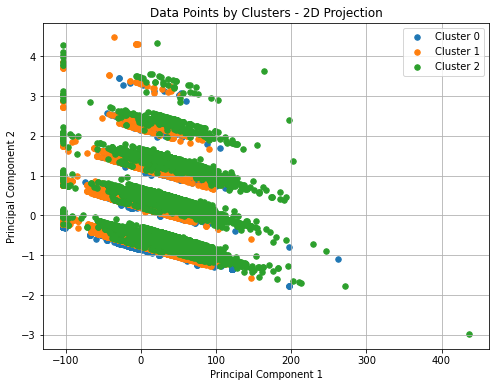

In [17]:
from sklearn.decomposition import PCA

# Assuming 'selected_df' contains the original data with cluster labels

# Reduce dimensionality for visualization using PCA with 2 components
pca = PCA(n_components=2)
reduced_data_2d = pca.fit_transform(selected_df.drop('Cluster_Labels', axis=1))  # Drop the cluster labels column

# Create a 2D scatter plot with data points colored by clusters
plt.figure(figsize=(8, 6))

for i in range(num_clusters):
    cluster_data = reduced_data_2d[selected_df['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1],
        label=f'Cluster {i}', s=30
    )

plt.title('Data Points by Clusters - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1440x864 with 0 Axes>

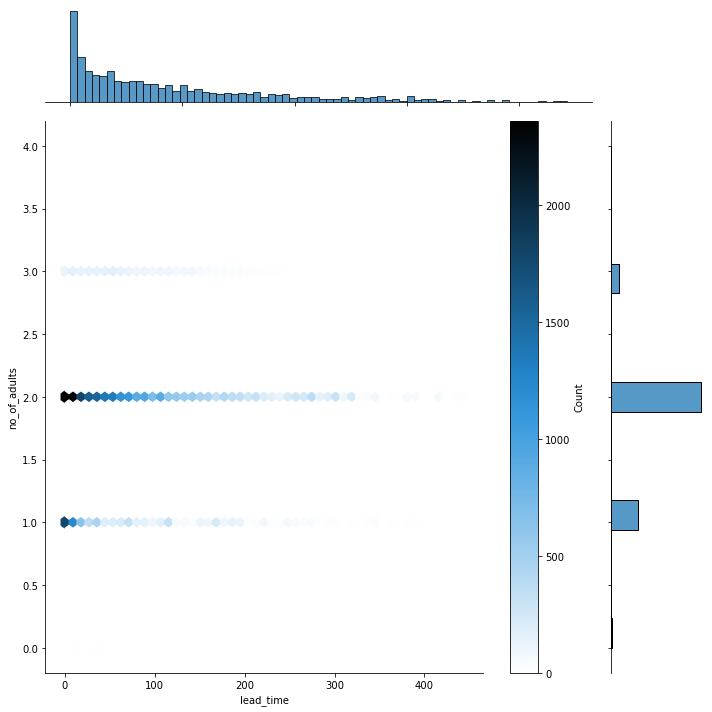

In [24]:
plt.figure(figsize=(20, 12))
joint = sns.jointplot(data=hotel_df_copy, x='lead_time', y='no_of_adults', kind='hex', height=10, ratio=5)
joint.fig.colorbar(joint.ax_joint.collections[0], label='Count')
plt.show()

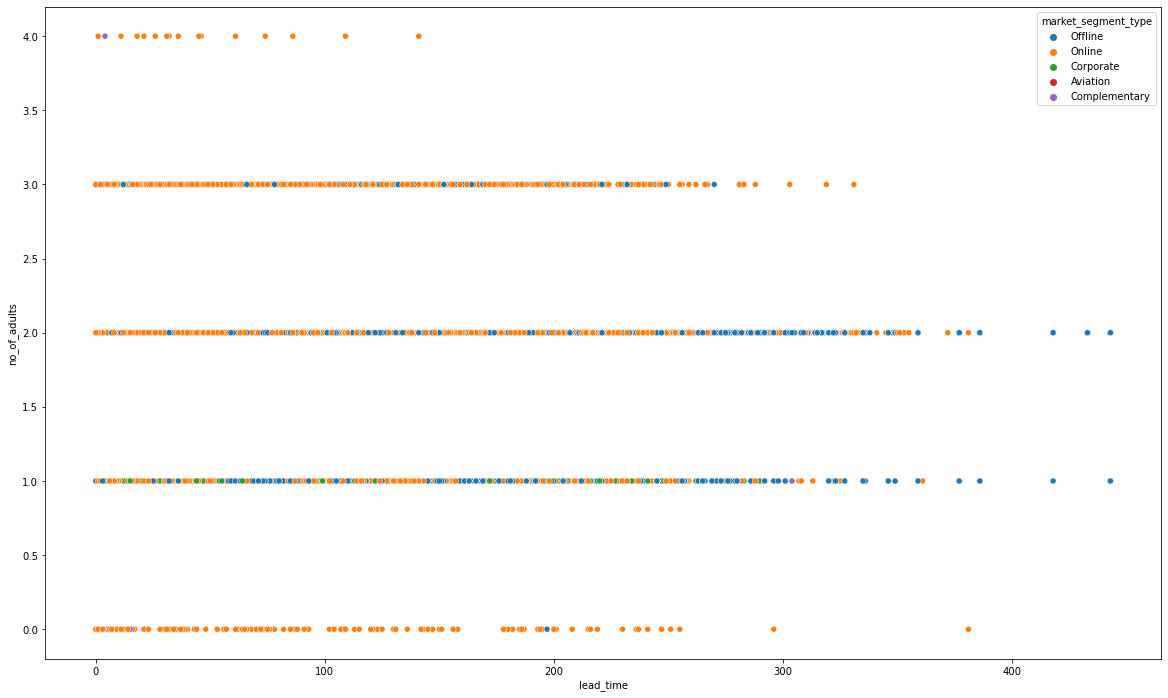

In [25]:
# creation of a scatter plot
plt.figure(figsize=(20, 12))
sns.scatterplot(data=hotel_df_copy, x='lead_time', y='no_of_adults', hue='market_segment_type')
plt.show()

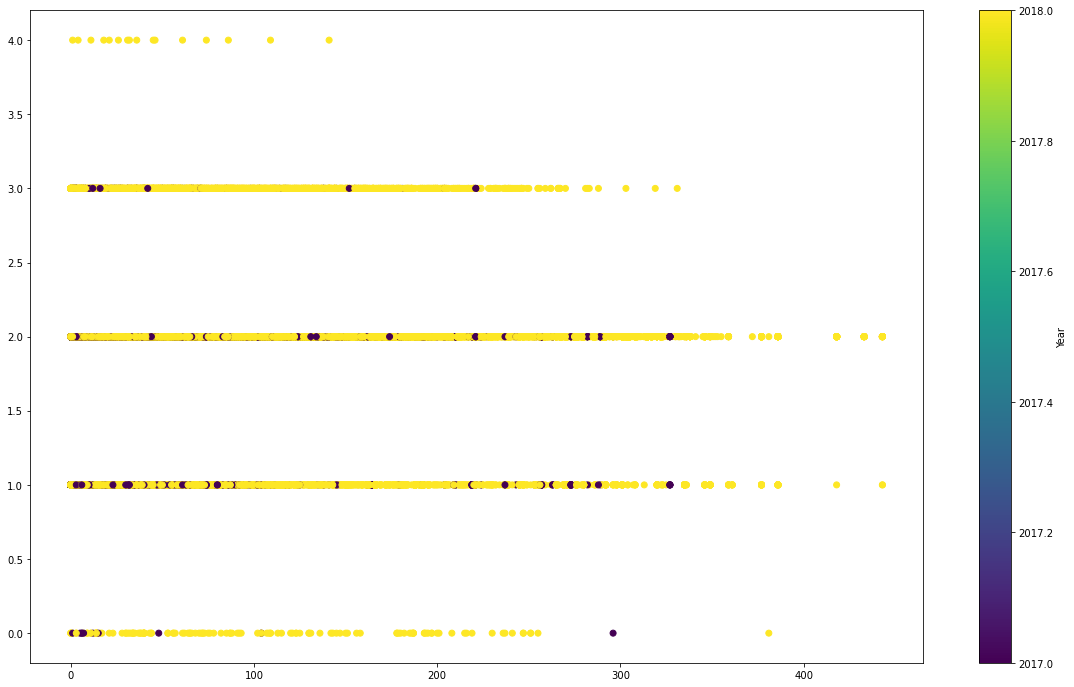

In [26]:
# creation of a scatter plot with matplotlib
plt.figure(figsize=(20, 12))
plt.scatter(data=hotel_df_copy, x='lead_time', y='no_of_adults', c='arrival_year')
plt.colorbar(label='Year')
plt.show()

<Figure size 1440x864 with 0 Axes>

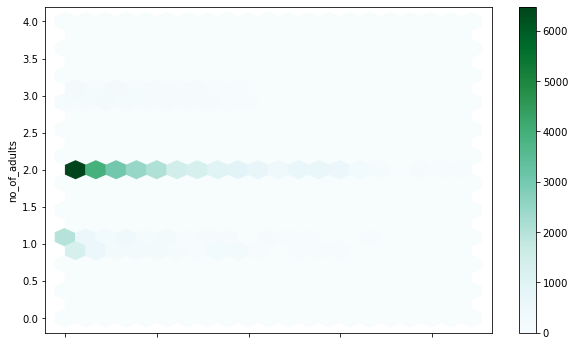

In [27]:
# creaetion of a df.plot hexbin 
plt.figure(figsize=(20, 12))
hotel_df_copy.plot.hexbin(x='lead_time', y='no_of_adults', gridsize=20, figsize=(10, 6))
plt.show()

# Cancellation Cluster Analysis

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/1312130782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/1312130782.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_data['Cluster_Labels'] = kmeans.labels_


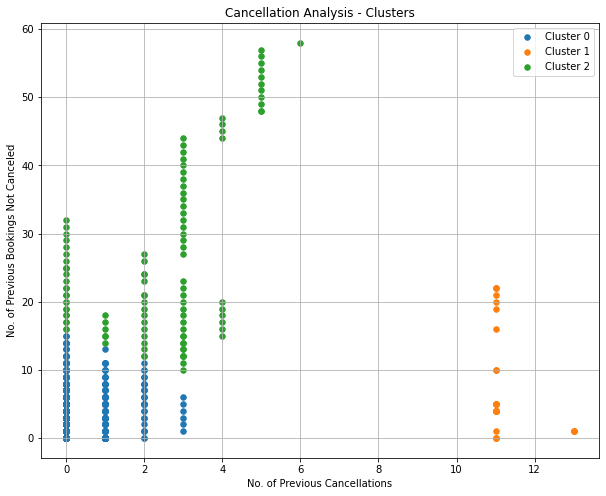

In [19]:
# Selecting relevant columns for cancellation analysis
cancellation_cols = ['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']

# Creating a DataFrame with selected columns
cancellation_data = hotel_df_copy[cancellation_cols]

# Handling missing values (if any)
cancellation_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancellation_data)

# Applying K-means clustering
num_clusters = 3  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
cancellation_data['Cluster_Labels'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_data = cancellation_data[cancellation_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['no_of_previous_cancellations'], cluster_data['no_of_previous_bookings_not_canceled'],
        label=f'Cluster {i}', s=30
    )

plt.title('Cancellation Analysis - Clusters')
plt.xlabel('No. of Previous Cancellations')
plt.ylabel('No. of Previous Bookings Not Canceled')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/2566853831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/2566853831.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data['Cluster_Labels'] = kmeans.labels_


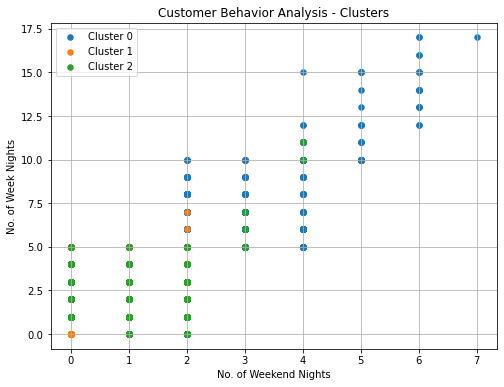

In [20]:
# Selecting columns for customer behavior analysis
behavior_cols = ['no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
                 'no_of_special_requests', 'avg_price_per_room']

# Creating a DataFrame with selected columns
behavior_data = hotel_df_copy[behavior_cols]

# Handling missing values (if any)
behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(behavior_data)

# Applying K-means clustering
num_clusters = 3  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
behavior_data['Cluster_Labels'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = behavior_data[behavior_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['no_of_weekend_nights'], cluster_data['no_of_week_nights'],
        label=f'Cluster {i}', s=30
    )

plt.title('Customer Behavior Analysis - Clusters')
plt.xlabel('No. of Weekend Nights')
plt.ylabel('No. of Week Nights')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/2734643047.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_37032/2734643047.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data['Cluster_Labels'] = kmeans.labels_


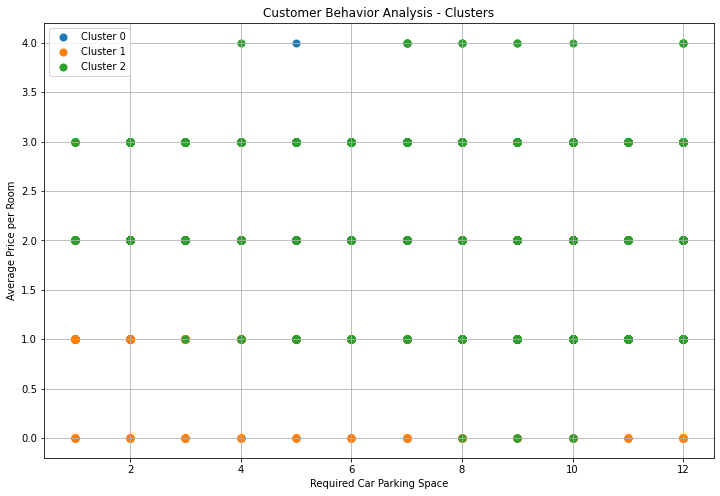

Cluster Means for Each Feature:
                required_car_parking_space  avg_price_per_room  \
Cluster_Labels                                                   
0                                      1.0          115.453016   
1                                      0.0           89.688126   
2                                      0.0          124.210148   

                no_of_special_requests  arrival_month  no_of_adults  
Cluster_Labels                                                       
0                             1.006228       7.157473      1.878114  
1                             0.191075       6.809575      1.672079  
2                             1.267324       8.419450      2.116375  


In [21]:
# Selecting columns for customer behavior analysis
behavior_cols = ['required_car_parking_space', 'avg_price_per_room', 'no_of_special_requests','arrival_month', 'no_of_adults']

# Adding more relevant columns as needed
# behavior_cols.extend(['other_column1', 'other_column2', ...])

# Creating a DataFrame with selected columns
behavior_data = hotel_df_copy[behavior_cols]

# Handling missing values (if any)
behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(behavior_data)

# Applying K-means clustering
num_clusters = 3  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
behavior_data['Cluster_Labels'] = kmeans.labels_

# Analyzing cluster characteristics
cluster_means = behavior_data.groupby('Cluster_Labels').mean()

# Visualizing the clusters with different columns
plt.figure(figsize=(12, 8))
for i in range(num_clusters):
    cluster_data = behavior_data[behavior_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['arrival_month'], cluster_data['no_of_adults'],
        label=f'Cluster {i}', s=50
    )

plt.title('Customer Behavior Analysis - Clusters')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Average Price per Room')
plt.legend()
plt.grid(True)
plt.show()

# Displaying cluster means for each feature
print("Cluster Means for Each Feature:")
print(cluster_means)